<a href="https://colab.research.google.com/github/noorasmat/KMeans-Clustering-in-Python/blob/master/Clustering_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Visualization and Clustering in Python: World Happiness Report**

This kernel shows basic visualization of data using Choropleth maps. Further, it tries to cluster the data using few clustering algorithms including K-means and Guassian Mixture Model based on several factors such as GDP per capita, life expectancy, corruption etc. We have considered 2017 data only. [Kaggle Help](https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python)

In [21]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
%matplotlib inline
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
wh = pd.read_csv("/content/drive/My Drive/DataSets/World_Happiness_Report_2017_Clustering.csv") #Read the dataset
wh.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [24]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

**Basic Visualization**

*Correlation among variables*

First, we will try to understand the correlation between few variables. For this, first compute the correlation matrix among the variables and plotted as heat map. 

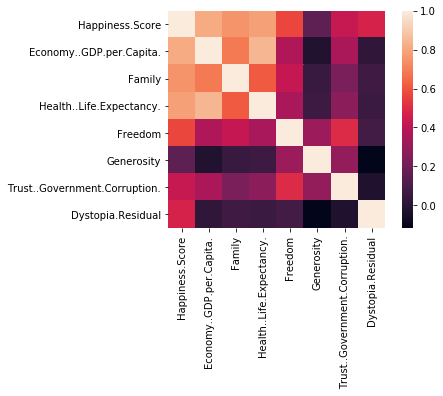

In [25]:
#Subsetting the data using 7 out of 12 columns
wh1 = wh[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] 
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

We have obtained the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents high correlation. We can see that happiness score is highly correlated with GDP per capita, family and life expectancy. It is least correlated with generosity. 

**Clustering Of Countries**

We are considering eight parameters, namely,  happiness score, GDP per capita, family,  life expectancy, freedom, generosity, corruption and Dystopia residual for clustering the countries. Since the clustering is sensitive to range of data. It is advisable to scale the data before proceeding. 

In [26]:
#Standrd normalization method. SUbtracting mean and divied by standard deviation
#Scaling of data using z-score. -infinity to +infinity is the range of z-score.
ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 1.93599602,  1.50618765,  1.20357658, ...,  0.8569643 ,
         1.90308437,  0.85629599],
       [ 1.92269283,  1.18651768,  1.26503623, ...,  0.80685634,
         2.73999784,  0.92989102],
       [ 1.90672969,  1.1823454 ,  1.47266877, ...,  1.70201314,
         0.30006609,  0.94796425],
       ...,
       [-1.77816933, -1.12910094, -0.51306362, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [-2.17193469, -2.12929212, -1.95262416, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [-2.35994869, -2.34773594, -4.15212515, ...,  0.253028  ,
        -0.65680192,  0.43290816]])

**(1) k-means clustering**

In general, k-means is the first choice for clustering because of its simplicity. Here, the user has to define the number of clusters (Post on how to decide the number of clusters would be dealt later). The clusters are formed based on the closeness to the center value of the clusters. The initial center value is chosen randomly.  K-means clustering is top-down approach, in the sense, we decide the number of clusters (k) and then group the data points into k clusters.

In [0]:
#K means Clustering 
def doKmeans(X, nclust=6):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 4)
kmeans = pd.DataFrame(clust_labels)
#wh1.drop('kmeans', axis=1)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

In [28]:
wh1.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0


In [29]:
wh1.describe()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238,1.741935
std,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028,1.183428
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,0.000000
25%,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291,1.000000
50%,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910,2.000000
75%,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654,3.000000
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,3.000000


In [30]:
kmeans[0]  # DataFrame contains Cluster labels, not centers


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
141    2
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
150    1
151    1
152    1
153    1
154    1
Name: 0, Length: 155, dtype: int32

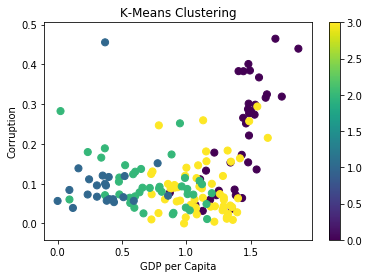

In [31]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=kmeans[0], s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

**(2) Agglomerative Clustering**

Also known as Hierarchical clustering, does not require the user to specify the number of clusters. Initially, each point is considered as a separate cluster, then it recursively clusters the points together depending upon the distance between them. The points are clustered in such a way that the distance between points within a cluster is minimum and distance between the cluster is maximum. Commonly used distance measures are Euclidean distance, Manhattan distance or Mahalanobis distance. Unlike k-means clustering, it is "bottom-up" approach. 

Python Tip: Though providing the number of clusters is not necessary but Python provides an option of providing the same for easy and simple use.

In [0]:
def doAgglomerative(X, nclust=6):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh1, 6)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative',agglomerative)

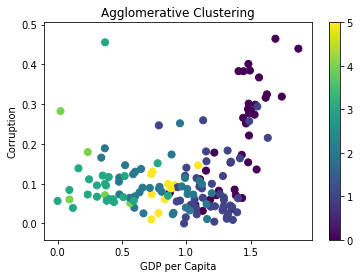

In [33]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'], c=agglomerative[0], s=50 )
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

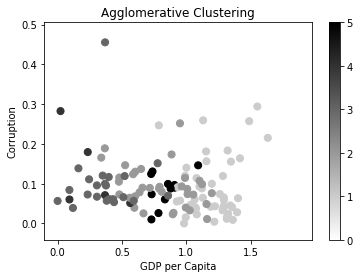

In [34]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)

#changing colors using cmap
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'], c=agglomerative[0], s=50, cmap='gist_yarg')
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

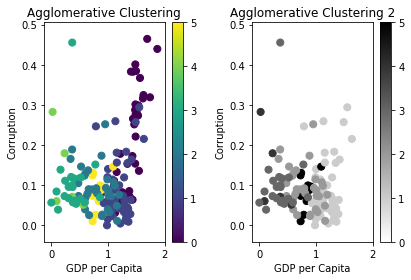

In [35]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
#grid of figures
fig = plt.figure()
fig.subplots_adjust(right=0.7)

#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im, cax=cbar_ax)

ax = fig.add_subplot(121)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'], c=agglomerative[0], s=50)
ax.set_title('Agglomerative Clustering' )
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)
#plt.colorbar(scatter, pad =0.2, shrink=0.9 )

ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'], c=agglomerative[0], s=50, cmap='gist_yarg')
ax2.set_title('Agglomerative Clustering 2')
ax2.set_xlabel('GDP per Capita')
ax2.set_ylabel('Corruption')
plt.colorbar(scatter2)
plt.tight_layout()